In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.models import resnet18

import string
from tqdm.notebook import tqdm
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import multiprocessing as mp

In [ ]:
data_path = "samples"

# Make train_test_split

In [ ]:
'''
Variables:
-----
image_file_name = 'qwer1.png'
image_file_names = ['qwer1.png', 'qwer2.png', 'qwer3.png']

-----
'''

"\nVariables:\n-----\nimage_file_name = 'qwer1.png'\nimage_file_names = ['qwer1.png', 'qwer2.png', 'qwer3.png']\n\n-----\n"

In [ ]:
image_file_names = os.listdir(data_path)

In [ ]:
image_file_names_train, image_file_names_test = train_test_split(image_file_names, random_state=0)
print("Number of train images: {}".format(len(image_file_names_train))) 
print("Number of test images: {}".format(len(image_file_names_test)))

Number of train images: 802
Number of test images: 268


# Define Character Maps

In [ ]:
'''
Variables: 

-----
image_names = ['qwer1','qwer2','qwer3']
image_name = 'qwer1'
images_characters = 'qwer1qwer2qwer3'

vocabulary = ['-', '2', '3', '4', 'n', 'p', 'w', 'x', 'y']
index2char = {0: '-', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: 'b', 9: 'c'}
char2index = {'-': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, 'b': 8, 'c': 9}
-----
'''

"\nVariables: \n\n-----\nimage_names = ['qwer1','qwer2','qwer3']\nimage_name = 'qwer1'\nimages_characters = 'qwer1qwer2qwer3'\n\nvocabulary = ['-', '2', '3', '4', 'n', 'p', 'w', 'x', 'y']\nindex2char = {0: '-', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: 'b', 9: 'c'}\nchar2index = {'-': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, 'b': 8, 'c': 9}\n-----\n"

In [ ]:
image_names = [image_file_name.split(".")[0] for image_file_name in image_file_names]
images_characters = "".join(image_names)
images_characters_unique = sorted(list(set(list(images_characters))))
print(len(images_characters_unique))
print(images_characters_unique)

19
['2', '3', '4', '5', '6', '7', '8', 'b', 'c', 'd', 'e', 'f', 'g', 'm', 'n', 'p', 'w', 'x', 'y']


In [ ]:
vocabulary = ["-"] + images_characters_unique 
index2char = {k:v for k,v in enumerate(vocabulary, start=0)}
char2index = {v:k for k,v in index2char.items()}

# Define Data Loader

In [ ]:
batch_size = 16
cpu_count = os.cpu_count()

In [ ]:
class CAPTCHADataset(Dataset):
    '''
    This class is used to 
    
    '''
    def __init__(self, data_dir, image_file_names):
        self.data_dir = data_dir
        self.image_file_names = image_file_names
        
    def __len__(self):
        return len(self.image_file_names)
    
    def __getitem__(self, index):
        image_file_name = self.image_file_names[index]
        image_file_path = os.path.join(self.data_dir, image_file_name)
        image = Image.open(image_file_path).convert('RGB')
        image = self.transform(image)
        image_name = image_file_name.split(".")[0]
        return image, image_name
    
    def transform(self, image):
        '''
        This function is used to 
        '''
        transform_ops = transforms.Compose([
            transforms.ToTensor(),
#             transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
            transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
        ])
        return transform_ops(image)

In [ ]:
transform_ops = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
        ])
data_dir = 'samples'
image_file_path = os.path.join(data_dir, image_file_names[1])
image = Image.open(image_file_path).convert('RGB')
image.show()
print(image)
image = transform_ops(image)
print(image)

<PIL.Image.Image image mode=RGB size=200x50 at 0x7F2564DE0ED0>
tensor([[[0.5059, 0.5059, 0.5059,  ..., 0.9686, 0.9686, 0.9686],
         [0.5059, 0.5059, 0.5059,  ..., 0.9686, 0.9686, 0.9686],
         [0.5059, 0.5059, 0.5059,  ..., 0.9686, 0.9686, 0.9686],
         ...,
         [0.5294, 0.5294, 0.5294,  ..., 0.9922, 0.9922, 0.9922],
         [0.5294, 0.5294, 0.5294,  ..., 0.9922, 0.9922, 0.9922],
         [0.5294, 0.5294, 0.5294,  ..., 0.9922, 0.9922, 0.9922]],

        [[0.5059, 0.5059, 0.5059,  ..., 0.9686, 0.9686, 0.9686],
         [0.5059, 0.5059, 0.5059,  ..., 0.9686, 0.9686, 0.9686],
         [0.5059, 0.5059, 0.5059,  ..., 0.9686, 0.9686, 0.9686],
         ...,
         [0.5294, 0.5294, 0.5294,  ..., 0.9922, 0.9922, 0.9922],
         [0.5294, 0.5294, 0.5294,  ..., 0.9922, 0.9922, 0.9922],
         [0.5294, 0.5294, 0.5294,  ..., 0.9922, 0.9922, 0.9922]],

        [[0.5059, 0.5059, 0.5059,  ..., 0.9686, 0.9686, 0.9686],
         [0.5059, 0.5059, 0.5059,  ..., 0.9686, 0.9686, 0.96

In [ ]:
train_dataset = CAPTCHADataset(data_path, image_file_names_train) 
test_dataset = CAPTCHADataset(data_path, image_file_names_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, num_workers=cpu_count, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=cpu_count, shuffle=False)
print(len(train_loader), len(test_loader))

51 17


In [ ]:
image_batch, text_batch = iter(train_loader).next()
print(image_batch.size(), text_batch)

torch.Size([16, 3, 50, 200]) ('dbny3', 'nngxc', '658xe', '5n732', '3den6', '65m85', 'w46ep', '8n2pg', '7cdge', 'm5meg', '6ecbn', 'b5pnn', 'yew6p', 'dce8y', 'x5nyn', 'd666m')


# Define Model

In [ ]:
number_characters = len(char2index)
device = torch.device('cpu')
resnet = resnet18(pretrained=True)

<generator object Module.children at 0x7f258222c7d0>


In [ ]:
list(resnet.children())

[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False),
 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 ReLU(inplace=True),
 MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False),
 Sequential(
   (0): BasicBlock(
     (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   )
   (1): BasicBlock(
     (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), pad

In [ ]:
list(resnet.children())[:-3]

[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False),
 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 ReLU(inplace=True),
 MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False),
 Sequential(
   (0): BasicBlock(
     (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   )
   (1): BasicBlock(
     (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), pad

In [ ]:
class CRNN(nn.Module):
    '''
    Here we crop the Resnet18 pretrained for 3 last layers:
    * Sequential (2 last Residual Blocks)
    * AdaptiveAvgPool2d 
    * Linear (in_features = 512, out_features=1000)
    
    And then add other layers: 
    * Sequential
        @Convolutional 2D
        @Batch Normalization 
        @Relu
    * GRU Gated Recurrent Units
    * GRU Gated Recurrent Units
    * Linear (in_features = 512, out_features=20 (exact number of chars))
    '''
    def __init__(self, num_chars, rnn_hidden_size=256, dropout=0.1):
        
        super(CRNN, self).__init__()
        self.num_chars = num_chars
        self.rnn_hidden_size = rnn_hidden_size
        self.dropout = dropout
        
        # CNN Part 1
        resnet_modules = list(resnet.children())[:-3]
        self.cnn_p1 = nn.Sequential(*resnet_modules)
        
        # CNN Part 2
        self.cnn_p2 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=(3,6), stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True)
        )
        self.linear1 = nn.Linear(1024, 256)
        
        # RNN
        self.rnn1 = nn.GRU(input_size=rnn_hidden_size, 
                            hidden_size=rnn_hidden_size,
                            bidirectional=True, 
                            batch_first=True)
        self.rnn2 = nn.GRU(input_size=rnn_hidden_size, 
                            hidden_size=rnn_hidden_size,
                            bidirectional=True, 
                            batch_first=True)
        self.linear2 = nn.Linear(self.rnn_hidden_size*2, num_chars)
        
        
    def forward(self, batch):
        '''
        Here we pass our batch by these parts 
        '''
        batch = self.cnn_p1(batch)
#         print(batch.size()) # torch.Size([-1, 256, 4, 13])
        
        batch = self.cnn_p2(batch) # [batch_size, channels, height, width]
#         print(batch.size())# torch.Size([-1, 256, 4, 10])
        
        batch = batch.permute(0, 3, 1, 2) # [batch_size, width, channels, height]
#         print(batch.size()) # torch.Size([-1, 10, 256, 4])
         
        batch_size = batch.size(0)
        T = batch.size(1)
        batch = batch.view(batch_size, T, -1) # [batch_size, T==width, num_features==channels*height]
#         print(batch.size()) # torch.Size([-1, 10, 1024])
        
        batch = self.linear1(batch)
#         print(batch.size()) # torch.Size([-1, 10, 256])
        
        batch, hidden = self.rnn1(batch)
        feature_size = batch.size(2)
        batch = batch[:, :, :feature_size//2] + batch[:, :, feature_size//2:]
#         print(batch.size()) # torch.Size([-1, 10, 256])
        
        batch, hidden = self.rnn2(batch)
#         print(batch.size()) # torch.Size([-1, 10, 512])
        
        batch = self.linear2(batch)
#         print(batch.size()) # torch.Size([-1, 10, 20])
        
        batch = batch.permute(1, 0, 2) # [T==10, batch_size, num_classes==num_features]
#         print(batch.size()) # torch.Size([10, -1, 20])
        
        return batch

In [ ]:
def weights_init(m):
    classname = m.__class__.__name__
    if type(m) in [nn.Linear, nn.Conv2d, nn.Conv1d]:
        torch.nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            m.bias.data.fill_(0.01)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

In [ ]:
crnn = CRNN(number_characters)
crnn.apply(weights_init)
crnn = crnn.to(device)

In [ ]:
list(crnn.children())

[Sequential(
   (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
   (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (2): ReLU(inplace=True)
   (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
   (4): Sequential(
     (0): BasicBlock(
       (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
       (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       (relu): ReLU(inplace=True)
       (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
       (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     )
     (1): BasicBlock(
       (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
       (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       (relu): ReLU(inplace=True)
 

In [ ]:
text_batch_logits = crnn(image_batch.to(device))
print(text_batch)
print(text_batch_logits.shape)

('dbny3', 'nngxc', '658xe', '5n732', '3den6', '65m85', 'w46ep', '8n2pg', '7cdge', 'm5meg', '6ecbn', 'b5pnn', 'yew6p', 'dce8y', 'x5nyn', 'd666m')
torch.Size([10, 16, 20])


# Define Loss

In [ ]:
criterion = nn.CTCLoss(blank=0)

In [ ]:
def encode_text_batch(text_batch):
    
    text_batch_targets_lens = [len(text) for text in text_batch]
    text_batch_targets_lens = torch.IntTensor(text_batch_targets_lens)
    
    text_batch_concat = "".join(text_batch)
    text_batch_targets = [char2index[c] for c in text_batch_concat]
    text_batch_targets = torch.IntTensor(text_batch_targets)
    
    return text_batch_targets, text_batch_targets_lens

In [ ]:
def compute_loss(text_batch, text_batch_logits):

    text_batch_logps = F.log_softmax(text_batch_logits, 2) # [T, batch_size, num_classes]  
    text_batch_logps_lens = torch.full(size=(text_batch_logps.size(1),), 
                                       fill_value=text_batch_logps.size(0), 
                                       dtype=torch.int32).to(device) # [batch_size] 
    text_batch_targets, text_batch_targets_lens = encode_text_batch(text_batch)
    loss = criterion(text_batch_logps, text_batch_targets, text_batch_logps_lens, text_batch_targets_lens)

    return loss

In [ ]:
compute_loss(text_batch, text_batch_logits)

tensor(4.5817, grad_fn=<MeanBackward0>)

# Train Model

In [ ]:
'''
If already trained and you don`t want to train, then exacute this block
'''
crnn = torch.load('tensor.pt')
'''
Then pass "Train Model" by 
'''

In [ ]:
num_epochs = 70
lr = 0.001
weight_decay = 1e-3
momentum = 0.9
clip_norm = 5

In [ ]:
optimizer = optim.Adam(crnn.parameters(), lr=lr, weight_decay=weight_decay)
lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, verbose=True, patience=5)

In [ ]:
crnn = CRNN(number_characters)
crnn.apply(weights_init)
crnn = crnn.to(device)

In [ ]:
epoch_losses = []
iteration_losses = []
num_updates_epochs = []
for epoch in tqdm(range(1, num_epochs+1)):
    epoch_loss_list = [] 
    num_updates_epoch = 0
    for image_batch, text_batch in tqdm(train_loader, leave=False):
        optimizer.zero_grad()
        text_batch_logits = crnn(image_batch.to(device))
        loss = compute_loss(text_batch, text_batch_logits)
        iteration_loss = loss.item()

        if np.isnan(iteration_loss) or np.isinf(iteration_loss):
            continue
          
        num_updates_epoch += 1
        iteration_losses.append(iteration_loss)
        epoch_loss_list.append(iteration_loss)
        loss.backward()
        nn.utils.clip_grad_norm_(crnn.parameters(), clip_norm)
        optimizer.step()

    epoch_loss = np.mean(epoch_loss_list)
    print("Epoch:{}    Loss:{}    NumUpdates:{}".format(epoch, epoch_loss, num_updates_epoch))
    epoch_losses.append(epoch_loss)
    num_updates_epochs.append(num_updates_epoch)
    lr_scheduler.step(epoch_loss)

Epoch:1    Loss:2.9562056765836826    NumUpdates:51


Epoch:2    Loss:2.340414659649718    NumUpdates:51


Epoch:3    Loss:1.8347823947083717    NumUpdates:51


Epoch:4    Loss:1.5236910020603853    NumUpdates:51


Epoch:5    Loss:1.3482120551315009    NumUpdates:51


Epoch:6    Loss:1.2665382623672485    NumUpdates:51


Epoch:7    Loss:1.161541922419679    NumUpdates:51


Epoch:8    Loss:1.119147984420552    NumUpdates:51


Epoch:9    Loss:1.0951407142713958    NumUpdates:51


Epoch:10    Loss:1.0266026387027665    NumUpdates:51


Epoch:11    Loss:1.0019532500528823    NumUpdates:51


Epoch:12    Loss:0.9976029185687795    NumUpdates:51


Epoch:13    Loss:0.9439056480632109    NumUpdates:51


Epoch:14    Loss:0.9609483316832897    NumUpdates:51


Epoch:15    Loss:0.8660829125666151    NumUpdates:51


Epoch:16    Loss:0.8342703288676692    NumUpdates:51


Epoch:17    Loss:0.8243862133400113    NumUpdates:51


Epoch:18    Loss:0.8317795664656396    NumUpdates:51


Epoch:19    Loss:0.7915287181442859    NumUpdates:51


Epoch:20    Loss:0.8062467995811912    NumUpdates:51


Epoch:21    Loss:0.7565026937746534    NumUpdates:51


Epoch:22    Loss:0.7379856109619141    NumUpdates:51


Epoch:23    Loss:0.7243492299435186    NumUpdates:51


Epoch:24    Loss:0.7053884641796935    NumUpdates:51


Epoch:25    Loss:0.7186612486839294    NumUpdates:51


Epoch:26    Loss:1.0038793472682728    NumUpdates:51


Epoch:27    Loss:0.8268322687523038    NumUpdates:51


Epoch:28    Loss:0.6934554682058447    NumUpdates:51


Epoch:29    Loss:0.67264777655695    NumUpdates:51


Epoch:30    Loss:0.6652565423180076    NumUpdates:51


Epoch:31    Loss:0.676371858400457    NumUpdates:51


Epoch:32    Loss:0.663296731079326    NumUpdates:51


Epoch:33    Loss:0.6741100970436545    NumUpdates:51


Epoch:34    Loss:0.7003484309888354    NumUpdates:51


Epoch:35    Loss:0.6956150742138133    NumUpdates:51


Epoch:36    Loss:0.8296990219284507    NumUpdates:51


Epoch:37    Loss:0.7089717656958336    NumUpdates:51


Epoch:38    Loss:0.6726515456741932    NumUpdates:51
Epoch    38: reducing learning rate of group 0 to 1.0000e-04.


Epoch:39    Loss:0.6102383989913791    NumUpdates:51


Epoch:40    Loss:0.5791175143391478    NumUpdates:51


Epoch:41    Loss:0.5693256060282389    NumUpdates:51


Epoch:42    Loss:0.5640189133438409    NumUpdates:51


Epoch:43    Loss:0.5610865927210041    NumUpdates:51


Epoch:44    Loss:0.5590295756564421    NumUpdates:51


Epoch:45    Loss:0.5550658223675746    NumUpdates:51


Epoch:46    Loss:0.5506459182383967    NumUpdates:51


Epoch:47    Loss:0.5467488707280627    NumUpdates:51


Epoch:48    Loss:0.5434612462333605    NumUpdates:51


Epoch:49    Loss:0.5447814780123094    NumUpdates:51


Epoch:50    Loss:0.5407368979033302    NumUpdates:51


Epoch:51    Loss:0.5374750997505936    NumUpdates:51


Epoch:52    Loss:0.535842660595389    NumUpdates:51


Epoch:53    Loss:0.533375177897659    NumUpdates:51


Epoch:54    Loss:0.5305973419956133    NumUpdates:51


Epoch:55    Loss:0.5292105762397542    NumUpdates:51


Epoch:56    Loss:0.527380543012245    NumUpdates:51


Epoch:57    Loss:0.5253377656141917    NumUpdates:51


Epoch:58    Loss:0.5243739263684142    NumUpdates:51


Epoch:59    Loss:0.5221532063156951    NumUpdates:51


Epoch:60    Loss:0.5219487828366897    NumUpdates:51


Epoch:61    Loss:0.5186916110562343    NumUpdates:51


Epoch:62    Loss:0.5178280028642392    NumUpdates:51


Epoch:63    Loss:0.5162661899538601    NumUpdates:51


Epoch:64    Loss:0.5160280658918268    NumUpdates:51


Epoch:65    Loss:0.5181737460342108    NumUpdates:51


Epoch:66    Loss:0.515268554874495    NumUpdates:51


Epoch:67    Loss:0.5121132673001757    NumUpdates:51


Epoch:68    Loss:0.5108726731702393    NumUpdates:51


Epoch:69    Loss:0.507615283423779    NumUpdates:51


Epoch:70    Loss:0.5090163718251621    NumUpdates:51



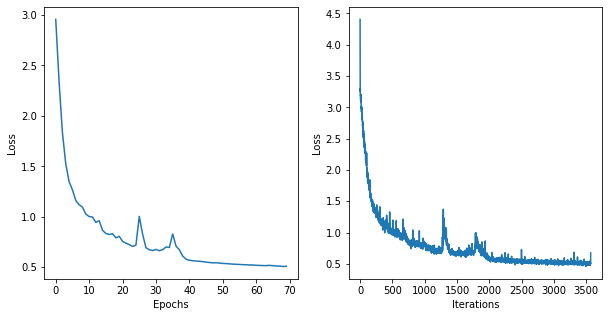

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(epoch_losses)
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")

ax2.plot(iteration_losses)
ax2.set_xlabel("Iterations")
ax2.set_ylabel("Loss")

plt.show()

In [ ]:
torch.save(crnn, 'tensor.pt')

/home/meow/.virtualenvs/main/lib/python3.7/site-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type CRNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


# Make predictions

In [ ]:
def decode_predictions(text_batch_logits):

    text_batch_tokens = F.softmax(text_batch_logits, 2).argmax(2) # [T, batch_size]
    text_batch_tokens = text_batch_tokens.numpy().T # [batch_size, T]

    text_batch_tokens_new = []
    for text_tokens in text_batch_tokens:
        text = [index2char[idx] for idx in text_tokens]
        text = "".join(text)
        text_batch_tokens_new.append(text)

    return text_batch_tokens_new

In [ ]:
results_train = pd.DataFrame(columns=['actual', 'prediction'])
train_loader = DataLoader(train_dataset, batch_size=16, num_workers=1, shuffle=False)
with torch.no_grad():
    for image_batch, text_batch in tqdm(train_loader, leave=True):
        text_batch_logits = crnn1(image_batch.to(device)) # [T, batch_size, num_classes==num_features]
        text_batch_pred = decode_predictions(text_batch_logits.cpu())
        df = pd.DataFrame(columns=['actual', 'prediction'])
        df['actual'] = text_batch
        df['prediction'] = text_batch_pred
        results_train = pd.concat([results_train, df])
results_train = results_train.reset_index(drop=True)

In [ ]:
results_test = pd.DataFrame(columns=['actual', 'prediction'])
test_loader = DataLoader(test_dataset, batch_size=16, num_workers=1, shuffle=False)
with torch.no_grad():
    for image_batch, text_batch in tqdm(test_loader, leave=True):
        text_batch_logits = crnn1(image_batch.to(device)) # [T, batch_size, num_classes==num_features]
        text_batch_pred = decode_predictions(text_batch_logits.cpu())
        df = pd.DataFrame(columns=['actual', 'prediction'])
        df['actual'] = text_batch
        df['prediction'] = text_batch_pred
        results_test = pd.concat([results_test, df])
results_test = results_test.reset_index(drop=True)

In [ ]:
print(results_train.shape)
results_train.head()

(802, 2)


,actual,prediction
0,f5cm2,ff55ccmm22
1,ee8fg,e--e88ffgg
2,fncnb,ffnnccnnbb
3,n265y,nn226655yy
4,fy2nd,ffyy22nndd


In [ ]:
print(results_test.shape)
results_test.head()

(268, 2)


,actual,prediction
0,fcey3,ffcceeyy33
1,g842c,gg884422cc
2,gcx6f,ggccxx66ff
3,8ypdn,88yyppddnn
4,defyx,ddeeffyyxx


In [ ]:
def remove_duplicates(text):
    if len(text) > 1:
        letters = [text[0]] + [letter for idx, letter in enumerate(text[1:], start=1) if text[idx] != text[idx-1]]
    elif len(text) == 1:
        letters = [text[0]]
    else:
        return ""
    return "".join(letters)

def correct_prediction(word):
    parts = word.split("-")
    for part in parts:
        if len(part)>3:
            for i in range(len(part)-3): 
                if (part[i] == part[i+1] and
                    part[i] == part[i+2] and
                    part[i] == part[i+3]):
                    index = parts.index(part)
                    parts.remove(part)
                    parts.insert(index, part[i+3:])
                    parts.insert(index, part[:i+1])
                    break
    parts = [remove_duplicates(part) for part in parts]
    corrected_word = "".join(parts)
    return corrected_word

In [ ]:
results_train['prediction_corrected'] = results_train['prediction'].apply(correct_prediction)
results_train

,actual,prediction,prediction_corrected
0,f5cm2,ff55ccmm22,f5cm2
1,ee8fg,e--e88ffgg,ee8fg
2,fncnb,ffnnccnnbb,fncnb
3,n265y,nn226655yy,n265y
4,fy2nd,ffyy22nndd,fy2nd
...,...,...,...
797,88bgx,8--8bbggxx,88bgx
798,cwmny,ccwwmmnnyy,cwmny
799,36w25,3366ww2255,36w25
800,6xpme,66xxppmmee,6xpme


In [ ]:
results_test['prediction_corrected'] = results_test['prediction'].apply(correct_prediction)
results_test.head()

,actual,prediction,prediction_corrected
0,fcey3,ffcceeyy33,fcey3
1,g842c,gg884422cc,g842c
2,gcx6f,ggccxx66ff,gcx6f
3,8ypdn,88yyppddnn,8ypdn
4,defyx,ddeeffyyxx,defyx


# 8 Evaluate the model

In [ ]:
mistakes_df = results_test[results_test['actual'] != results_test['prediction_corrected']]
mistakes_df

,actual,prediction,prediction_corrected
21,g888x,gg8----8xx,g88x
51,77387,7--78-8877,77887
97,mwdf6,mmwwwwd666,mwwd6
105,wdww8,wwdd-www88,wdw8
107,w48cw,ww44888www,w48w
108,cnmnn,ccnnnnn--n,cnnn
114,mxnw4,mmxxmmww44,mxmw4
165,2yggg,22yygg---g,2ygg
167,7nnnx,77n----nxx,7nnx
182,5mfff,55mmff---f,5mff


In [ ]:
print(mistakes_df['prediction_corrected'].str.len().value_counts())

5    7
4    7
Name: prediction_corrected, dtype: int64


In [ ]:
mask = mistakes_df['prediction_corrected'].str.len() == 5
mistakes_df[mask]

,actual,prediction,prediction_corrected
51,77387,7--78-8877,77887
97,mwdf6,mmwwwwd666,mwwd6
114,mxnw4,mmxxmmww44,mxmw4
185,wgnwp,wwggmmwwpp,wgmwp
206,nf2n8,mmff22nn88,mf2n8
210,emwpn,eemmmmppnn,emmpn
225,wm47f,wwmmmm77ff,wmm7f


samples/77387.png


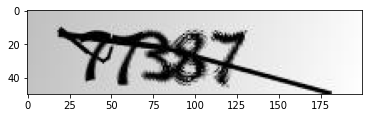

In [ ]:
mistake_image_fp = os.path.join(data_path, mistakes_df[mask]['actual'].values[0] + ".png")
print(mistake_image_fp)
mistake_image = Image.open(mistake_image_fp)
plt.imshow(mistake_image)
plt.show()

In [ ]:
train_accuracy = accuracy_score(results_train['actual'], results_train['prediction_corrected'])
print(train_accuracy)
test_accuracy = accuracy_score(results_test['actual'], results_test['prediction_corrected'])
print(test_accuracy)

0.9937655860349127
0.9477611940298507
